![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
transformed_df = penguins_df.copy()
transformed_df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [3]:
transformed_df = pd.get_dummies(transformed_df, columns=["sex"])


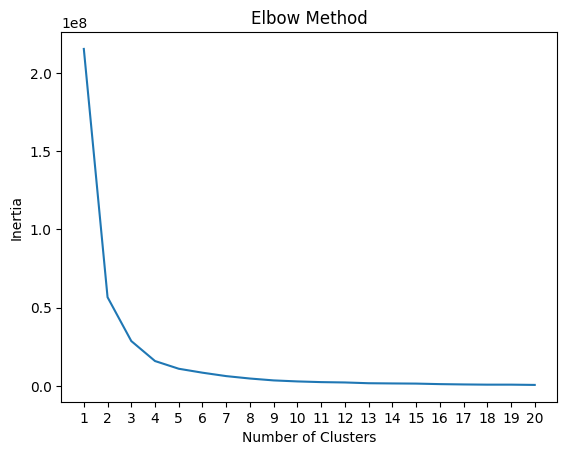

In [7]:
# get the inertia
inertia = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(transformed_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,21), inertia)
plt.xticks(range(1,21))
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [8]:
# we can see that the elbow is at 3, so we will use 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(transformed_df)

penguins_df["Cluster"] = kmeans.labels_


In [9]:
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Cluster
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,0
2,40.3,18.0,195.0,3250.0,FEMALE,0
3,36.7,19.3,193.0,3450.0,FEMALE,0
4,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE,1
328,46.8,14.3,215.0,4850.0,FEMALE,1
329,50.4,15.7,222.0,5750.0,MALE,1
330,45.2,14.8,212.0,5200.0,FEMALE,1


In [13]:
stat_penguins = penguins_df.drop('sex', axis=1).groupby("Cluster").mean()

In [14]:
stat_penguins


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
Cluster,,,,
0,41.122143,17.946429,189.628571,3461.250000
1,48.662500,15.397500,219.987500,5365.937500
2,44.329464,17.415179,201.580357,4309.821429
